# Covid-19 현황 분석

In [229]:
# import
import requests
from urllib.parse import urlparse
import urllib.parse
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import re
import seaborn as sns
import json
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
# 카카오 키 불러오기
key_fd = open('kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [2]:
key_fd = open('./과제data/gov_data_api_key2.txt', mode='r')
govapi_key = key_fd.read(100)
key_fd.close()

In [41]:
start_date = '20200101'
end_date = datetime.today().strftime("%Y%m%d")

In [60]:
corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
url = f'{corona_url}?ServiceKey={govapi_key+"3D"}&pageNo=1&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'

KeyboardInterrupt: 

In [43]:
result = requests.get(url)

In [44]:
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')
soup.find('resultCode').get_text()

'00'

In [45]:
total_count = int(soup.find('totalCount').text)
total_count 

5405

'21.57'

In [286]:
def_dict = {} # 확진자
isol_dict ={} # 자가격리 
death_dict = {} # 사망
qur_dict = {} # 10만명당 발생률
for i in range(total_count):
    if i < total_count - 109 :
        a = soup.find_all('stdDay')[i].text.split('일')[0].replace(' ','').replace('년','-').replace('월','-')# 날짜
        if len(a.split('-')[1]) == 1:
            a = a.split('-')[0] + '-0' + a.split('-')[1] + '-' + a.split('-')[2]
        b = soup.find_all('gubun')[i].text # 구분(시)
        c = soup.find_all('defCnt')[i].text.split()[0] # 확진자 수
        d = soup.find_all('isolClearCnt')[i].text.split()[0] 
        e = soup.find_all('deathCnt')[i].text.split()[0]    # 사망자 수
        f = soup.find_all('qurRate')[i].text
        if a in def_dict.keys():
            def_dict[a][b] = c
            isol_dict[a][b] = d
            death_dict[a][b] = e
            qur_dict[a][b] = f
        else:
            def_dict.update({a : {b : c}}) 
            isol_dict.update({a : {b : d}})
            death_dict.update({a : {b : e}})
            qur_dict.update({a : {b : f}})

    elif i >= total_count - 109 and i < total_count - 19:
        a = soup.find_all('stdDay')[i].text.split('일')[0].replace(' ','').replace('년','-').replace('월','-') # 날짜
        if len(a.split('-')[1]) == 1:
            a = a.split('-')[0] + '-0' + a.split('-')[1] + '-' + a.split('-')[2]
        b = soup.find_all('gubun')[i].text # 구분(시)
        c = soup.find_all('defCnt')[i].text.split()[0] # 확진자 수
        d = 0 
        e = soup.find_all('deathCnt')[i].text.split()[0]    # 사망자 수
        f = soup.find_all('qurRate')[i].text
        if a in def_dict.keys():
            def_dict[a][b] = c
            isol_dict[a][b] = d
            death_dict[a][b] = e
            qur_dict[a][b] = f
        else:
            def_dict.update({a : {b : c}}) 
            isol_dict.update({a : {b : d}})
            death_dict.update({a : {b : e}})
            qur_dict.update({a : {b : f}})
    elif i >= total_count - 19: 
        a = soup.find_all('stdDay')[i].text.split('일')[0].replace(' ','').replace('년','-').replace('월','-') # 날짜
        if len(a.split('-')[1]) == 1:
            a = a.split('-')[0] + '-0' + a.split('-')[1] + '-' + a.split('-')[2]
        b = soup.find_all('gubun')[i].text # 구분(시)
        c = 0 # 확진자 수
        d = 0 
        e = soup.find_all('deathCnt')[i].text.split()[0]    # 사망자 수
        f = soup.find_all('qurRate')[i].text
        if a in def_dict.keys():
            def_dict[a][b] = c
            isol_dict[a][b] = d
            death_dict[a][b] = e
            qur_dict[a][b] = f
        else:
            def_dict.update({a : {b : c}}) 
            isol_dict.update({a : {b : d}})
            death_dict.update({a : {b : e}})
            qur_dict.update({a : {b : f}})

In [ ]:
def_df = pd.DataFrame(def_dict)
isol_df = pd.DataFrame(isol_dict)
death_df = pd.DataFrame(death_dict)
qur_df = pd.DataFrame(qur_dict)

In [ ]:
def_df.to_csv("./results/def_df.csv", encoding='utf-8', sep=',')
isol_df.to_csv("./results/isol_df.csv", encoding='utf-8', sep=',')
death_df.to_csv("./results/death_df.csv", encoding='utf-8', sep=',')
qur_df.to_csv("./results/qur_df.csv", encoding='utf-8', sep=',')

In [204]:
df = pd.read_csv('./results/def_df.csv')

In [205]:
df.rename({'Unnamed: 0' : '지역'},axis=1,inplace=True)
df.set_index('지역',inplace=True)

In [206]:
df = df.T

In [207]:
df.index = pd.to_datetime(df.index)

In [208]:
df.sort_index(inplace=True)

In [209]:
df.head()

지역,검역,제주,경남,경북,전남,전북,충남,충북,강원,경기,세종,울산,대전,광주,인천,대구,부산,서울,합계
2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-04,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-05,NaN,4.0,74.0,861.0,4.0,7.0,86.0,12.0,23.0,110.0,1.0,23.0,16.0,14.0,9.0,4327.0,92.0,103.0,0.0
2020-03-06,NaN,4.0,77.0,984.0,4.0,7.0,90.0,15.0,25.0,120.0,1.0,23.0,18.0,13.0,9.0,4694.0,95.0,105.0,6284.0
2020-03-07,NaN,4.0,82.0,1049.0,4.0,7.0,92.0,20.0,26.0,130.0,2.0,23.0,18.0,13.0,9.0,5084.0,96.0,108.0,6767.0


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276 entries, 2020-03-01 to 2020-12-04
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   검역      264 non-null    float64
 1   제주      276 non-null    float64
 2   경남      276 non-null    float64
 3   경북      276 non-null    float64
 4   전남      276 non-null    float64
 5   전북      276 non-null    float64
 6   충남      276 non-null    float64
 7   충북      276 non-null    float64
 8   강원      276 non-null    float64
 9   경기      276 non-null    float64
 10  세종      276 non-null    float64
 11  울산      276 non-null    float64
 12  대전      276 non-null    float64
 13  광주      276 non-null    float64
 14  인천      276 non-null    float64
 15  대구      276 non-null    float64
 16  부산      276 non-null    float64
 17  서울      276 non-null    float64
 18  합계      276 non-null    float64
dtypes: float64(19)
memory usage: 43.1 KB


In [211]:
del df['합계']

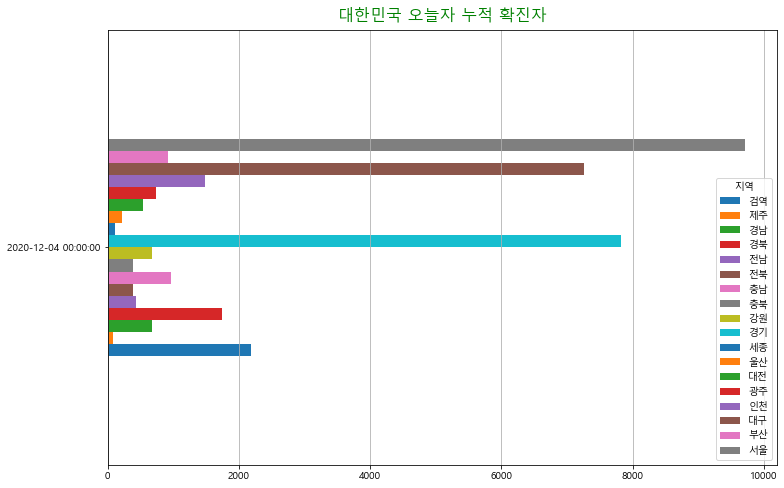

In [212]:
df[-1:].plot.barh(figsize=(12,8))
plt.grid(True, axis='x')
ytitle = '오늘'
plt.title('대한민국 오늘자 누적 확진자', loc='center', pad=10, fontsize=16, color='g')
plt.show()

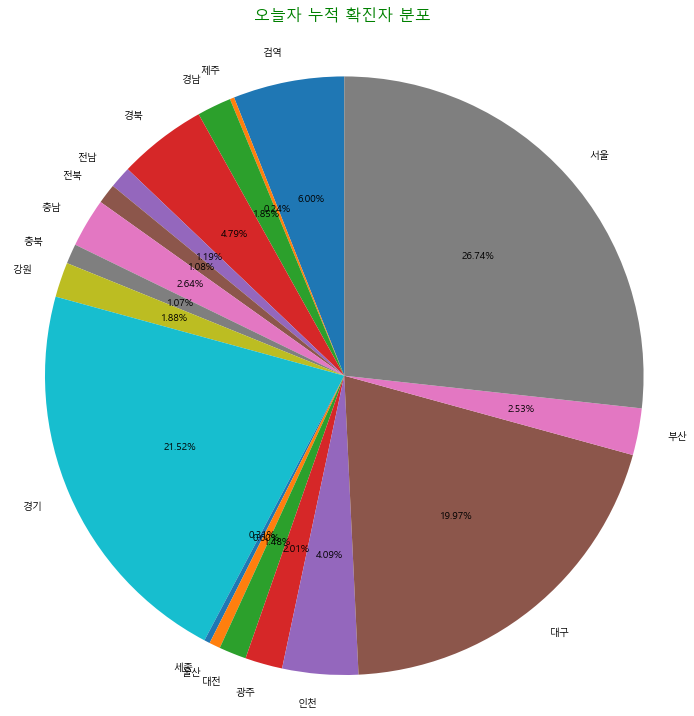

In [213]:
plt.figure(figsize=(12,12))
label = df.columns
plt.pie(df.loc['2020-12-04'],autopct='%.2f%%',labels=label,startangle=90)
plt.axis('equal')
plt.title('오늘자 누적 확진자 분포', loc='center', pad=30, fontsize=16, color='g')
plt.show()

In [214]:
day_df = df - df.shift(1)

In [215]:
#지역별 일일 확진자(3월 5일 데이터 부터 있어서, 3월 6일부터 데이터가 정확하다.)
day_df
day_df = day_df[3:]

In [216]:
day_df

지역,검역,제주,경남,경북,전남,전북,충남,충북,강원,경기,세종,울산,대전,광주,인천,대구,부산,서울
2020-03-06,NaN,0.0,3.0,123.0,0.0,0.0,4.0,3.0,2.0,10.0,0.0,0.0,2.0,-1.0,0.0,367.0,3.0,2.0
2020-03-07,NaN,0.0,5.0,65.0,0.0,0.0,2.0,5.0,1.0,10.0,1.0,0.0,0.0,0.0,0.0,390.0,1.0,3.0
2020-03-08,NaN,0.0,1.0,32.0,0.0,0.0,6.0,4.0,1.0,11.0,1.0,1.0,0.0,0.0,0.0,297.0,1.0,12.0
2020-03-09,NaN,0.0,0.0,26.0,0.0,0.0,4.0,1.0,1.0,11.0,3.0,0.0,1.0,2.0,0.0,190.0,-1.0,10.0
2020-03-10,NaN,0.0,0.0,10.0,0.0,0.0,2.0,0.0,0.0,11.0,2.0,0.0,-1.0,0.0,4.0,92.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,-51.0,1.0,20.0,4.0,5.0,16.0,5.0,21.0,8.0,70.0,1.0,3.0,5.0,13.0,33.0,4.0,52.0,167.0
2020-12-01,14.0,1.0,11.0,11.0,2.0,9.0,16.0,32.0,9.0,96.0,2.0,3.0,10.0,22.0,16.0,11.0,31.0,155.0
2020-12-02,6.0,2.0,7.0,5.0,1.0,26.0,8.0,16.0,12.0,144.0,7.0,10.0,5.0,10.0,23.0,4.0,32.0,193.0
2020-12-03,13.0,1.0,13.0,11.0,2.0,9.0,14.0,10.0,8.0,141.0,4.0,2.0,7.0,3.0,22.0,3.0,15.0,262.0


In [217]:
day_df.to_csv("./results/day_df.csv", encoding='utf-8', sep=',')


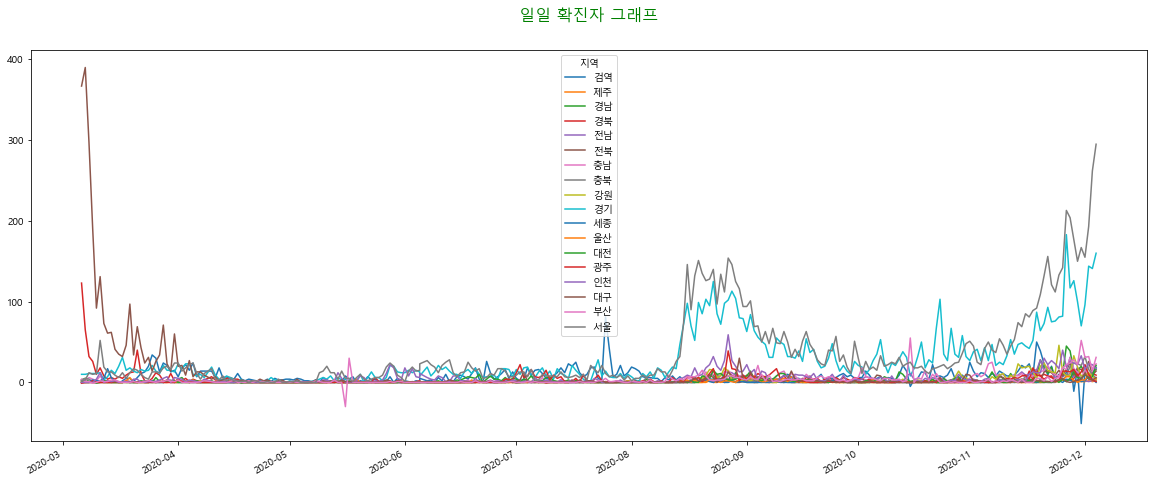

In [225]:
day_df.plot(figsize=(20,8))
plt.title('일일 확진자 그래프', loc='center', pad=30, fontsize=16, color='g')
plt.show()

In [219]:
# 데이터 오류가 부산에서 두개 발견 되었다.
day_df[day_df['부산']<0]

지역,검역,제주,경남,경북,전남,전북,충남,충북,강원,경기,세종,울산,대전,광주,인천,대구,부산,서울
2020-03-09,NaN,0.0,0.0,26.0,0.0,0.0,4.0,1.0,1.0,11.0,3.0,0.0,1.0,2.0,0.0,190.0,-1.0,10.0
2020-05-16,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,-30.0,5.0


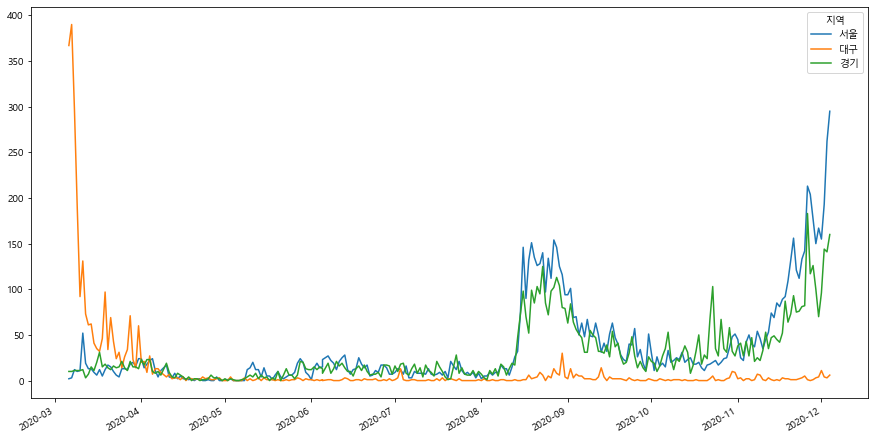

In [220]:
# 서울, 대구 , 경기의 일일 확진자 그래프
day_df[['서울','대구','경기']].plot(figsize=(15,8))
plt.show()

### 지도에 표시하기

In [232]:
# 각 시청 or 도청 구하기
c_l = day_df.columns
cc_l = []
for i in range(len(c_l)):
    if i > 8:
        cc_l.append(c_l[i] +  '시청')
    else :
        cc_l.append(c_l[i] +  '도청')
del cc_l[0]
addr = []
for i in cc_l:
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + i
    result = requests.get(urlparse(url).geturl(),headers={"Authorization": "KakaoAK "+kmap_key}).json()
    addr.append(result['documents'][0]['address_name'])
addr

['제주특별자치도 제주시 연동 312-1',
 '경남 창원시 의창구 사림동 1',
 '경북 안동시 풍천면 갈전리 1155',
 '전남 무안군 삼향읍 남악리 1000',
 '전북 전주시 완산구 효자동3가 1',
 '충남 홍성군 홍북읍 신경리 538',
 '충북 청주시 상당구 문화동 89',
 '강원 춘천시 봉의동 15',
 '경기 화성시 남양읍 남양리 2000',
 '세종특별자치시 보람동 626-5',
 '울산 남구 신정동 646-4',
 '대전 서구 둔산동 1420',
 '경기 광주시 송정동 570',
 '인천 남동구 구월동 1138',
 '대구 중구 동인동1가 2-1',
 '부산 연제구 연산동 1000',
 '서울 중구 태평로1가 31']